## Classification using SSD model

In this demo, we will implement classification with ssd model.

We have trained this model for 10000 steps.

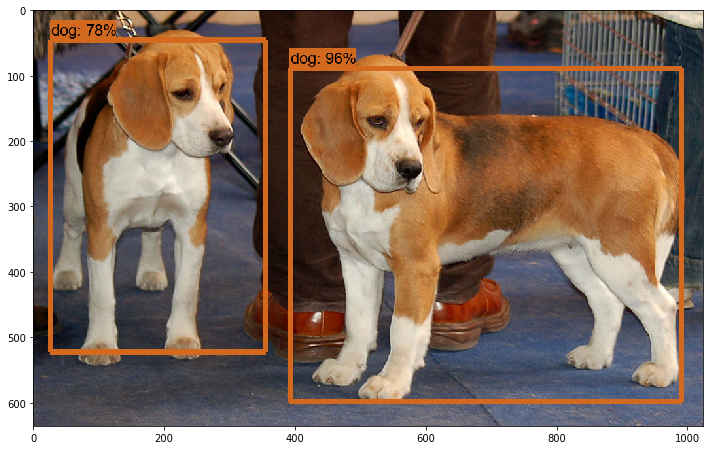

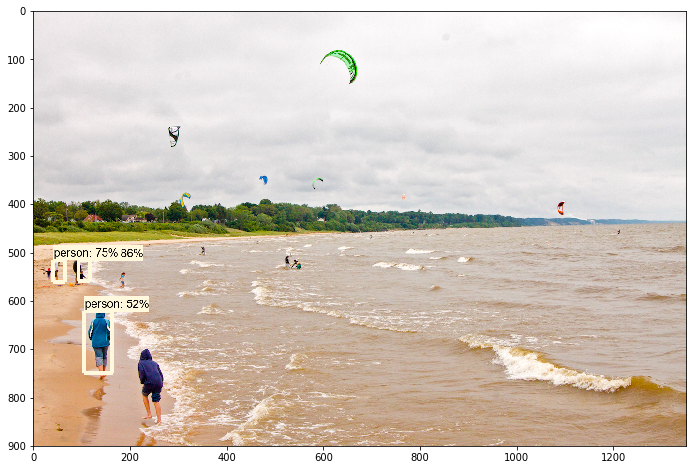

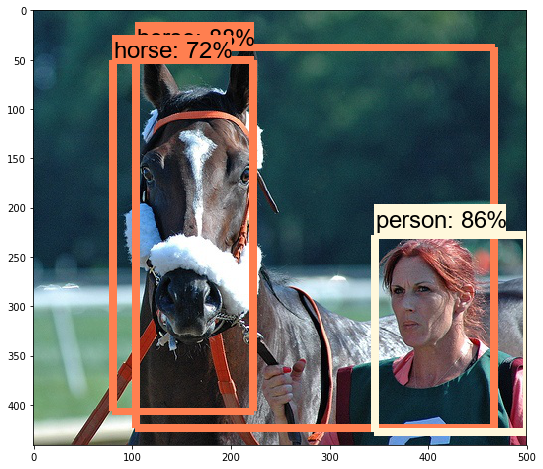

In [3]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import cv2
# import tarfile
import tensorflow as tf
# import zipfile
 
from collections import defaultdict
from io import StringIO
from PIL import Image
 
%matplotlib inline
#sys.path.append("..")
 
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
 
from matplotlib import pyplot as plt
 
PATH_TO_CKPT = 'object_detection/voc/export_ssd/frozen_inference_graph.pb'
 
PATH_TO_LABELS = 'object_detection/voc/pascal_label_map.pbtxt'
 
NUM_CLASSES = 20
 
#load model
detection_graph = tf.Graph() 
with detection_graph.as_default(): 
  od_graph_def = tf.GraphDef() 
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid: 
    serialized_graph = fid.read() 
    od_graph_def.ParseFromString(serialized_graph) 
    tf.import_graph_def(od_graph_def, name='')
    #for node in od_graph_def.node: 
    #    print (node.name)
 
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES,
                                                            use_display_name=True)
category_index = label_map_util.create_category_index(categories)
 
 
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
 
 
PATH_TO_TEST_IMAGES_DIR = '/project/models-master/research/object_detection/test_images'
TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 4)]  ##change
IMAGE_SIZE = (12, 8)
 
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
        
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8,min_score_thresh=.5)
     
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)

In [2]:
%matplotlib inline

## Classification using faster-cnn model


We have trained this model for 1000 steps.

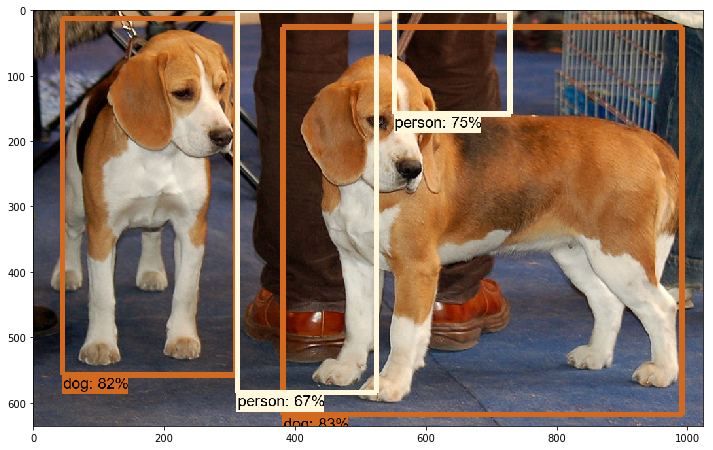

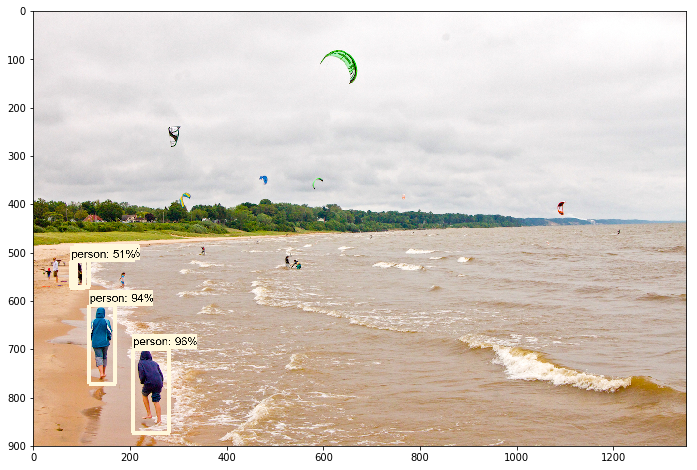

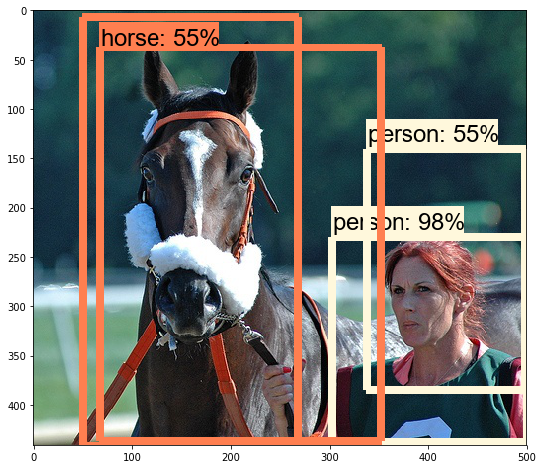

In [4]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import cv2
# import tarfile
import tensorflow as tf
# import zipfile
 
from collections import defaultdict
from io import StringIO
from PIL import Image
 
%matplotlib inline
#sys.path.append("..")
 
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
 
from matplotlib import pyplot as plt
 
PATH_TO_CKPT = 'object_detection/voc/export/frozen_inference_graph2.pb'
 
PATH_TO_LABELS = 'object_detection/voc/pascal_label_map.pbtxt'
 
NUM_CLASSES = 20
 
#load model
detection_graph = tf.Graph() 
with detection_graph.as_default(): 
  od_graph_def = tf.GraphDef() 
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid: 
    serialized_graph = fid.read() 
    od_graph_def.ParseFromString(serialized_graph) 
    tf.import_graph_def(od_graph_def, name='')
    #for node in od_graph_def.node: 
    #    print (node.name)
 
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES,
                                                            use_display_name=True)
category_index = label_map_util.create_category_index(categories)
 
 
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
 
 
PATH_TO_TEST_IMAGES_DIR = '/project/models-master/research/object_detection/test_images'
TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 4)]  ##change
IMAGE_SIZE = (12, 8)
 
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
        
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8,min_score_thresh=.5)
     
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)